# NATURAL LANGUAGE PROCESSING WITH RNN AND LSTM

## Encoding Text

Neural networks don't take raw text data as an input. This means we need to encode textual data to numeric values that the model can understand. 

Furthermore when we encode words, we would like to recognize similar and different to catch similarity among them.

### Word Embeddings
To solve this issue we can use **word embeddings**. This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike classical and logical methods, word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the begining of a neural network model.

## Recurrent Neural Networks (RNN's)

### Recurrent Neural Networks

RNN's are a kind of neural network that is pretty capable of processing sequential data such as text. 

I will consider the folling topics:
- Sentiment Analysis
- Character Generation 

RNN's are complex and come in many different forms so I wil focus on how they work and the kind of problems they are best suited for.

When dealing with texts, it is not quite usefull to keep tha data all at once. After all, even we (humans) don't process text all at once. We read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. Well this is exaclty what a recurrent neural network is designed to do. When we say recurrent neural network all we really mean is a network that contains a loop. A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.

![alt text](RNN.png)

*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

A recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text but there could be some problems when sentences became longer. In fact, it gets increasingly difficult for the network to understand the text properly when it gets longer.

## LSTM

However, there exist some other recurrent layers that can solve this problem such as the LSTM (Long Short-Term Memory). This layer works quite similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. While in the simple RNN layer input from previous timestamps gradually disappeared as we got further through the input, with a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This also allows to discover more useful relationships between inputs and when they appear. 

## Sentiment Analysis

*It is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*
(Wikipedia)

The example I considered here is abount classifying movie reviews as positive, negative or neutral.

*This work is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn*

### Movie Review Dataset

I will use the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.

In [123]:
import keras
import tensorflow as tf
import os
import numpy as np
from keras.datasets import imdb #loading the IMDB movie review dataset from keras
from keras.preprocessing import sequence

VOCAB_SIZE = 88584 #number of unique words

MAXLEN = 250 #max lenght considered for a review
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [125]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [126]:
# How many words have the first review in the training set
len(train_data[0])

218

In [129]:
#labels tell me how a review is classified 
for i in range(10):
    print(train_labels[i])

1
0
0
1
0
0
1
0
1
0


In [130]:
counter = 0
for i in train_labels:
    if i == 1:
        counter += 1
print(counter)      

12500


In [131]:
#maximum and minimum lenght of a review
lenreviewlist = []
for i in range(len(train_data)):
    lenreviewlist.append(len(train_data[i]))
    
print(max(lenreviewlist))
print(min(lenreviewlist))

2494
11


In [132]:
#average lenght of a review
from statistics import mean

media = mean(lenreviewlist)
media

238.71364

In [133]:
#Let see the distribution of lenghts around the mean
counter1 = 0
counter2 = 0
for ln in lenreviewlist:
    if ln >= round(media):
        counter1 += 1
    else:
        counter2 += 1
        
print("There are " + str(counter1) + " occurrences above the mean!")
print("There are " + str(counter2) + " occurrences below the mean!")

There are 8431 occurrences above the mean!
There are 16569 occurrences below the mean!


In [134]:
#Let see the distribution of lenghts around the MAXLEN chosen
counter1 = 0
counter2 = 0
for ln in lenreviewlist:
    if ln >= MAXLEN:
        counter1 += 1
    else:
        counter2 += 1
        
print("There are " + str(counter1) + " occurrences above MAXLEN!")
print("There are " + str(counter2) + " occurrences below MAXLEN!")

There are 7879 occurrences above MAXLEN!
There are 17121 occurrences below MAXLEN!


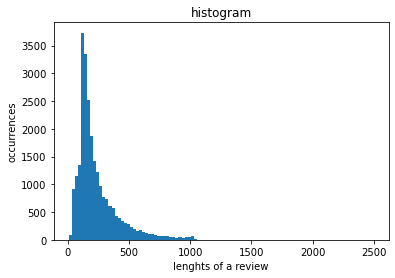

In [135]:
#lenght distribution
import matplotlib.pyplot as plt

plt.hist(lenreviewlist, bins=100) 
# Add title and axis names
plt.xlabel('lenghts of a review')
plt.ylabel('occurrences')
plt.title("histogram") 
plt.show()

### More Preprocessing
Looking at some reviews, we have seen that they have different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:

- I chosed a MAXLEN = 250 to set the common lenght of our reviews
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

In [136]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

In [137]:
#CHECK
counter = 0
for i in range(len(train_data)):
    if len(train_data[i]) == 250 and len(test_data[i]) == 250:
        counter += 1
if counter == len(train_data):
    print('TRUE: all reviews have the same lenght')
else:
    print('FALSE: something went wrong')

TRUE: all reviews have the same lenght


### Creating the Model
To create the model I will use a word embedding layer as the first layer and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment. 

Here is a simple example of a Sequential model that processes sequences of integers, embeds each integer into a 32-dimensional vector, then processes the sequence of vectors using a LSTM layer.

In [138]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [139]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size VOCAB_SIZE, and
# output embedding dimension of size 32.
# 32: output dimension of the vectors generated by the embedding layer 
# (it can be changed in 64 for example)
model.add(layers.Embedding(input_dim=VOCAB_SIZE, output_dim=32))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(32))

# Add a Dense layer with 1 units.
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          2834688   
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


In [140]:
#training first model
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['acc'])

#we use 20% of training data to validate
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 48s 77ms/step - loss: 0.4232 - acc: 0.8065 - val_loss: 0.2867 - val_acc: 0.8840
Epoch 2/10
625/625 [==============================] - 48s 77ms/step - loss: 0.2402 - acc: 0.9089 - val_loss: 0.2670 - val_acc: 0.8938
Epoch 3/10
625/625 [==============================] - 45s 72ms/step - loss: 0.1832 - acc: 0.9329 - val_loss: 0.3026 - val_acc: 0.8874
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.1547 - acc: 0.9449 - val_loss: 0.2913 - val_acc: 0.8900
Epoch 5/10
625/625 [==============================] - 45s 73ms/step - loss: 0.1281 - acc: 0.9560 - val_loss: 0.2965 - val_acc: 0.8928
Epoch 6/10
625/625 [==============================] - 47s 76ms/step - loss: 0.1100 - acc: 0.9625 - val_loss: 0.3182 - val_acc: 0.8874
Epoch 7/10
625/625 [==============================] - 48s 76ms/step - loss: 0.0981 - acc: 0.9678 - val_loss: 0.4686 - val_acc: 0.8620
Epoch 8/10
625/625 [==============================] - 48s 76ms

In [141]:
#testing

results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 13s 16ms/step - loss: 0.6163 - acc: 0.8175
[0.6163066029548645, 0.817520022392273]


### Making Predictions
Now let’s use our network to make predictions on our own reviews. 

Since our reviews are encoded we'll need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.

In [142]:
word_index = imdb.get_word_index() #gets parameters of imdb

#convert a text in the same format of imdb
def encode_text(text):
    '''
    Encode text in the good format for the neural network
    '''
    tokens = keras.preprocessing.text.text_to_word_sequence(text)
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]
    return sequence.pad_sequences([tokens], MAXLEN)[0]

In [143]:
text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17  13  4

In [144]:
len(encoded)

250

In [145]:
#while were at it lets make a decode function
#from integer to words
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_text(integers):
    '''
    Decode a list of integer into a text
    '''
    PAD = 0
    text = ""
    for num in integers:
        if num != PAD: #I want to skip zeros
            text += reverse_word_index[num] + " "

    return text[:-1]

In [146]:
print(decode_text(encoded))

that movie was just amazing so amazing


In [150]:
#make a prediction
#if 1 is a good prediction, if 0 is a bad prediction

def predict(text):
    '''
    Make a prediction about new reviews
    '''
    encoded_text = encode_text(text)
    pred = np.zeros((1,250)) #I create a list of 250 zeros
    pred[0] = encoded_text #I fullfill the list with the ecncoded text
    result = model.predict(pred) #I apply my model to predict the text
    print(result[0])

In [151]:
positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)

[0.8992923]
[0.19408754]


In [161]:
neg1 = 'This movie was very bad. I have never seen anything so disgusting and howful.'
predict(neg1)

[0.39208558]


In [172]:
pos1 = 'bad'
predict(pos1)

NameError: name 'predict' is not defined

## RNN Play Generator

Now I am going to use a RNN for text generation. I will simply show to the RNN an example of something I want it to recreate and it will learn how to write a version of it on its own. I'll do this using a character predictive model that will take as input a variable length sequence and predict the next character.


*Based on the following: https://www.tensorflow.org/tutorials/text/text_generation*

In [1]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

### Dataset
For the training I am going to use the shakespeare.txt file in keras, which is an extract from a shakesphere play.

In [2]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [3]:
#Read, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
#length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [4]:
#Take a look at the first 250 characters
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



Since this text isn't encoded yet, I need to do it. I am going to create a dictionary encoding each unique character as a different integer.

In [5]:
vocab = sorted(set(text)) #set of sorted unique characters

# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)} #discrionary of simbols
idx2char = np.array(vocab) #array of simbols

def text_to_int(text):
    '''
    unction that can convert our text to integer values
    '''
    return np.array([char2idx[c] for c in text])

#convert text to int
text_as_int = text_to_int(text)

In [6]:
#looking at the dictionary
print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [7]:
print(idx2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [8]:
# lets look at how part of our text is encoded
# now each character is an integer number
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [9]:
#function that can convert our numeric values to text
def int_to_text(ints):
    '''
    Function that can convert our numeric values to text
    '''
    try:
        ints = ints.numpy()
    except:
        pass
    return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


### Creating Training Examples
To solve our task we need to split the text data from above into many shorter sequences that we can pass to the model as training examples. 

The training examples we will prepare will use a *seq_length* sequence as input and a *seq_length* sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

```input: Firs | output: irst```

The first step will be to create a stream of characters from the text data.

In [10]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1) #just a fraction of the entire dataset

#Create training examples / targets
#each element is something like tf.Tensor(18, shape=(), dtype=int64)
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [11]:
#we can use the batch method to turn this stream of characters into batches of desired length
#it will return a tensor of lenght seq_length+1
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [12]:
#The first sequence is:
for i in sequences.take(1):
    print(i)

tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1], shape=(101,), dtype=int64)


Now we need to use these sequences and split them into input and output.

In [13]:
def split_input_target(chunk):  # for the example: First
    '''
    Splits a sequence
    '''
    input_text = chunk[:-1]  # firs
    target_text = chunk[1:]  # irst
    return input_text, target_text  # firs, irst

In [14]:
#Applicative example

split_input_target(list("First"))

(['F', 'i', 'r', 's'], ['i', 'r', 's', 't'])

In [15]:
#we use map to apply the above function to every entry
dataset = sequences.map(split_input_target)  

In [16]:
#What this mean applied to our dataset (at the first sequence for example)
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43,
       44, 53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39,
       52, 63,  1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1,
       51, 43,  1, 57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31,
       54, 43, 39, 49,  6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56,
       57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 37, 53, 59])>, <tf.Tensor: shape=(100,), dtype=int64, numpy=
array([47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
       53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52,
       63,  1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51,
       43,  1, 57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54,
       43, 39, 49,  6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57,
       58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1])>)


In [17]:
for inp, out in dataset.take(2):
    print("\n\nEXAMPLE\n")
    print("INPUT")
    print(int_to_text(inp))
    print("\nOUTPUT")
    print(int_to_text(out))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


In [18]:
#make training batches

BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256 #dimensionality of the vector who represents my words
RNN_UNITS = 1024

#Buffer size to shuffle the dataset
#TF data is designed to work with possibly infinite sequences,
#so it doesn't attempt to shuffle the entire sequence in memory. Instead,
#it maintains a buffer in which it shuffles elements.
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

### Building the Model
To build the model I am going to use as embedding layer a LSTM and one dense layer that contains a node for each unique character in our training data. The dense layer will give us a probability distribution over all nodes.

In [163]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units,
                             return_sequences=True,
                             stateful=True,
                             recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
      ])
    return model

model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (64, None, 256)           16640     
_________________________________________________________________
lstm_15 (LSTM)               (64, None, 1024)          5246976   
_________________________________________________________________
dense_17 (Dense)             (64, None, 65)            66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


### Creating a Loss Function
Now we are going to create our own loss function. This is because our model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch. 

In [164]:
#Having a look at a sample input and the output from our untrained model. 
#This is so we can understand what the model is giving us:

#This is so we can understand what the model is giving us

for input_example_batch, target_example_batch in data.take(1):
    #ask our model for a prediction on our first batch of training data (64 entries)
    example_batch_predictions = model(input_example_batch)  
    #print out the output shape
    print(example_batch_predictions.shape, "---> (batch_size, sequence_length, vocab_size)")  

(64, 100, 65) ---> (batch_size, sequence_length, vocab_size)


In [148]:
#we can see that the predicition is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(len(example_batch_predictions[0]))

64
100


In [79]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(pred)
# notice this is a 2d array of length 100, where each interior array 
# is the prediction for the next character at each time step

tf.Tensor(
[[ 0.00445798  0.00134858 -0.00162167 ... -0.00028184 -0.0039648
   0.00053552]
 [ 0.00089486 -0.00240264 -0.00456375 ...  0.00299994 -0.00367627
   0.00339394]
 [ 0.0051625  -0.00305768 -0.00127644 ...  0.00161988 -0.00073513
   0.00845567]
 ...
 [ 0.00495043 -0.00049978 -0.00193697 ...  0.0014215  -0.00419908
   0.00390788]
 [ 0.00098599 -0.00077373 -0.00172263 ... -0.00185591 -0.00192765
   0.00776092]
 [-0.00578503  0.00924841  0.00202241 ... -0.0007435  -0.00247671
   0.00286253]], shape=(100, 65), dtype=float32)


In [80]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probability of each character occuring next

65
tf.Tensor(
[ 0.00445798  0.00134858 -0.00162167  0.00209351 -0.00392073  0.00720163
  0.00102119 -0.00258099 -0.00530009 -0.00631695  0.00344318 -0.00220213
  0.00614996 -0.00286755  0.00014293 -0.00032655 -0.00147814 -0.00224423
  0.00483373 -0.00361421  0.00014439  0.00262165  0.00301029  0.00091313
 -0.00163417  0.00902739 -0.00292949  0.00148445 -0.00478405  0.00686833
 -0.00228322  0.00301745  0.00074382 -0.00712284  0.00256641  0.00537799
 -0.0006014  -0.0055846  -0.00523396 -0.00258584  0.00342558 -0.00560113
  0.00080947 -0.00215131 -0.0002083   0.00402516  0.00501857 -0.00042529
 -0.00158762  0.00646292 -0.00061794  0.00415354 -0.00078896 -0.00030841
  0.0023119   0.00079     0.00071945 -0.00119077  0.00604747  0.00401607
 -0.00467812 -0.00131532 -0.00028184 -0.0039648   0.00053552], shape=(65,), dtype=float32)


In [81]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to text to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
sampled_indices

array([45, 18, 48, 62, 51, 36,  1, 60, 30,  4,  9, 63, 40, 35, 50, 54, 17,
       27, 23, 48, 60, 15, 48, 45,  4,  0, 29, 44, 51, 57, 53, 35, 54, 46,
       35, 41,  9, 30,  7,  3, 45, 14, 53, 50, 15,  5, 50, 47, 56, 54, 20,
       38, 12, 19, 47, 40, 18, 32, 34,  4, 42, 51, 40, 57, 26, 48, 12, 32,
       59, 16, 10, 60, 25, 44,  3, 28, 54, 10,  0, 26, 57, 42, 54, 30, 54,
        8, 36, 37, 40, 50, 15, 15, 18, 39, 40,  4, 49, 45, 60,  9])

In [82]:
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

"gFjxmX vR&3ybWlpEOKjvCjg&\nQfmsoWphWc3R-$gBolC'lirpHZ?GibFTV&dmbsNj?TuD:vMf$Pp:\nNsdpRp.XYblCCFab&kgv3"

In [39]:
#sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
#sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
#sampled_indices

In [40]:
#predicted_chars = int_to_text(sampled_indices)

#redicted_chars  # and this is what the model predicted for training sequence 1

So now we need to create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were.

In [149]:
def loss(labels, logits):
    #Because our model returns logits, you need to set the from_logits flag to True.
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [150]:
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Mean loss: ", mean_loss)

Mean loss:  4.1743603


A newly initialized model shouldn't be too sure of itself, the output logits should all have similar magnitudes. To confirm this you can check that the exponential of the mean loss is approximately equal to the vocabulary size. A much higher loss means the model is sure of its wrong answers, and is badly initialized:

In [85]:
tf.exp(mean_loss).numpy()

64.99168

In [86]:
VOCAB_SIZE

65

In [87]:
r = 2 #fix range

if VOCAB_SIZE - r < tf.exp(mean_loss).numpy() < VOCAB_SIZE + r:
    print('TRUE: output logits have similar magniture')
else:
    print('FALSE: badly initialization')

TRUE: output logits have similar magniture


### Compiling the Model
At this point we can think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next. 

In [151]:
#Configure the training procedure using the tf.keras.Model.compile method. 
#Use tf.keras.optimizers.Adam with default arguments and the loss function.

model.compile(optimizer='adam', loss=loss)

CONFIGURE CHECKPOINT:

Use a tf.keras.callbacks.ModelCheckpoint to ensure that checkpoints are saved during training:

In [166]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [167]:
#training
N_epochs = 1 #number of epochs of training (for computational problems)
#history = model.fit(data, epochs=N_epochs, callbacks=[checkpoint_callback])
history = model.fit(data, epochs=N_epochs, )

SyntaxError: invalid syntax (<ipython-input-167-639792f8ff28>, line 2)

In [168]:
model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, 1)

In [153]:
BATCH_SIZE

64

In [169]:
#I load data from the checkpoit without training again
tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (1, None, 256)            16640     
_________________________________________________________________
lstm_16 (LSTM)               (1, None, 1024)           5246976   
_________________________________________________________________
dense_18 (Dense)             (1, None, 65)             66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


### Generate Text


In [170]:
def generate_text(model, start_string):
    
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 800

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
    
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [171]:
start = 'ROMEO: '
print(generate_text(model, start_string = start))

ROMEO: o pandy:
Mron has beedel is I my theek shear is youg ffage.

MOBGUEEY:,
N'tt Meait his lave I as nat no he horese.

RWORUSES:
Y se rond, stared Meare,
This, And day groo I re thye ase farpadsers on bese be as, she ca me;

PUWINCOS:
Siching ast of vime awerf
Wo reece dyar!

PINENTEO:
Sy lot of so wack doss
For setare he ouk Hefomed, bost th thapl sonfon sererlole.

Ars IfNRUUS:
I,
Het'l is anw a mate wol preen pringint begther: Sean the
henter makewst he canty;
Ise saye hos the row leaste:
A hard eavemnort in Ciraebut, and it Custreese
Nut ther Hecarse at thy srrematince?
Bum EFpains:
I sheld I co he vorw:
O way ghyse heme ap. swate my of me the forsens
'thang er greas bio hisf my our buss.

RWARY,
Be,
Gy firth seen-
Mate yourath my ary the buste
Wacners af govers, and whot That as thes ast


In [133]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string:  ROMEO:


ROMEO:
Bhes hers yours, he in thue, bester? me wat vear wour I gise whoodss wore ow searse but if to nod d saingiod so thit
What wens h'd your Iull ald.

LIONYUCSUS:
Thent
ENRSEENA
NABDARBER:
Bat affar? Low beat vimp lave ho will ro' injusate to theare; whace nogors blenime lis,
Alb Setan
You dot and Josher you!
Ad loor the ripfore de thee un bleile.

KANG HIVCAn RANI Godraro I'averx, Co flougtered an mence a't heve beter nots are
an I put mald in the came:
Sy note st sast of, ald the ded-angay!
Shes lave thee-Larile I gamen? It co wele twem oel hind the crnoag. The lace now sore.

MERYOI:
Y wease go slast as; Sa bliet sthef hplame sutsings to shue ands, fram, lo thear shayver a my ceonger.
Stor thet here fornow the gith he,
I foret: she hoth ut inde ma the
erting menth cenchathas,
wion whas ble


In [136]:
def generate_text(model, start_seed,gen_size=100,temp=1.0):
    
    # Number of characters to generate
    num_generate = gen_size
    # Vecotrizing starting seed text
    input_eval = [char2idx[s] for s in start_seed]
    # Expand to match batch format shape
    input_eval = tf.expand_dims(input_eval, 0)
    # Empty list to hold resulting generated text
    text_generated = []
    # Temperature effects randomness in our resulting text
    # The term is derived from entropy/thermodynamics.
    # The temperature is used to effect probability of next characters.
    # Higher probability == lesss surprising/ more expected
    # Lower temperature == more surprising / less expected
    temperature = temp
    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        
        # Generate Predictions
        predictions = model(input_eval)
        # Remove the batch shape dimension
        predictions = tf.squeeze(predictions, 0)
        # Use a cateogircal disitribution to select the next character
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        # Pass the predicted charracter for the next input
        input_eval = tf.expand_dims([predicted_id], 0)
        # Transform back to character letter
        text_generated.append(idx2char[predicted_id])
    return (start_seed + ''.join(text_generated))

print(generate_text(model,"flower",gen_size=1000))

flower's I menof
P:
Geron that hald I nuf be noth of tule and dair ant alds be:
Yeil someriengs, andallt sa,
And slat roder bear!
Buthing an gating thes shith sit?
Yous lok,

IONZES:
He then Il ur you, as sipover hith his, hake frirster?
O rangel soodst,
The thew wliging se in, the follt grorsssend of coofur.

RISWARDENBIO:
'd suts that you shale?

PEOTEO:
Nowe shearme fost, Ly thes weor than wead wame, af be the ncoowat
Andour'ds rrean leath muss moferes kenk
Mantrage youe his cromes of a wim my lain and thich
O'ljoully bround be tak shae e and s kndeate makest lasion's! aw gorst to the thave praght hears, sach, is feack hit hoth may,
Ont you is llogher nus is and his look;
Brather: my suesf as Lame Tombon!
I RLOUK:
Lo herene com came; and this y whet awrory wett cain.

NONESEES:
This lamy my ot succladnt if,
And Sother, le he onasper his whese; dith llave is nattin,
Sw thone lot vord'mage us nath stout ke of dy ghave the aeg;
Maveed, thour bemelabe fo reathw Lorangre,
The negnen?

KE

## Sources

1. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.
2. “Text Classification with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_classification_rnn.
3. “Text Generation with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_generation.
4. “Understanding LSTM Networks.” Understanding LSTM Networks -- Colah's Blog, https://colah.github.io/posts/2015-08-Understanding-LSTMs/.
5. "Working with RNN's"
https://keras.io/guides/working_with_rnns/